# Data visualisation
## by Prakash Srinivsan, Ryan van der Werf and Jim van Veenhuyzen (group 70)
\
In this notebook we aim to visualise our data obtained from the matrix factorization algorithms in the other notebook. More specifically, we use the feature matrices for both the users and movies. The user and movie matrices are $U$ and $V$ & $U$ and $M$ for the $\textbf{UV decomposition}$ and the $\textbf{Matrix Factorization}$ respectively. 

In [1]:
#Import general python libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import random
#Import sklearn related functions, most importantly PCA and TSNE
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
#Import UMAP 
import umap
import umap.plot

In [62]:
usersData = pd.read_csv('users.dat', sep='::', header=None, \
                        names=['UserID', 'Gender', 'Age', 'Occupation', 'Zip-code'], engine='python')
ratingsData = pd.read_csv('ratings.dat', sep='::', header=None, names=['UserID', 'MovieID', 'Rating', 'Timestamp'], engine='python')
moviesData = pd.read_csv('movies.dat', sep='::', header=None, \
                         names=['MovieID', 'Title', 'Genres'], engine='python', encoding='latin1')

usersData.head()

,UserID,Gender,Age,Occupation,Zip-code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [78]:
U1 = np.load('predicted_U_1.npy')
V1 = np.load('V_fold1.npy')
users1 = np.load('userID_fold1.npy') 
movies1 = np.load('movieID_fold1.npy')

df_U1 = pd.DataFrame(data=U1,index=users1, columns=[1,2,3,4,5,6,7,8,9,10])

ratingsData.head()
usersData.head()
moviesData.head()

,MovieID,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


Now that we've imported the data, lets first apply $\textbf{PCA}$ to reduce the dimensionality to 2. First, we analyse the user matrix $U$ from the $\textbf{Matrix Factorization}$. For the user data, the main areas of interest are the $\textit{gender}$, $\textit{age}$ and $\textit{occupation}$ of the user. The following code inspects whether there is any clustering for the $\textit{genders}$ and $\textit{ages}$ of the users. 

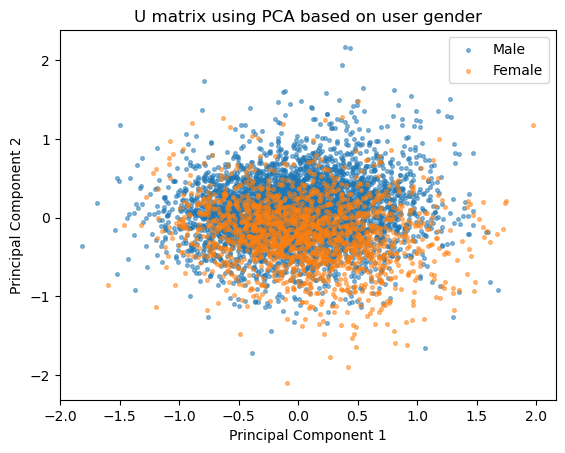

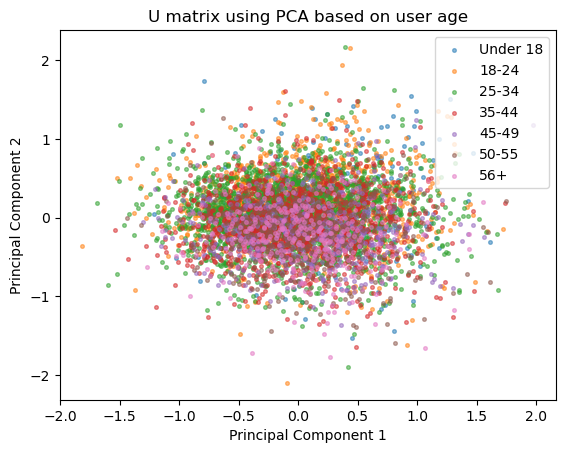

In [107]:
#Obtain the user data in the Gender and Age columns
#U1_user = usersData.iloc[users1-1]
U1_user = usersData[usersData['UserID'].isin(users1)]
U1_gender = U1_user['Gender']
user_age = U1_user['Age']

#Define the ages and corresponding labels
user_age = U1_user['Age']
labels_age = np.unique(user_age)
#print(labels_age)
labels_age = ["Under 18","18-24","25-34","35-44","45-49","50-55","56+"]

#Define the genders and corresponding labels
U1_gender = U1_user['Gender']
labels_gender = ['Male','Female']
#labels_gender = np.unique(U1_gender)

#Apply the PCA on the U-matrix, reducing the number of user-features and thus the amount of columns to 2
pca = PCA(n_components=2)
pca_data = pca.fit_transform(U1)

#Visualise the clustering based on gender
fig, ax = plt.subplots()
label_index = 0
for g in np.unique(user_gender):
    indices = np.where(user_gender == g)
    ax.scatter(pca_data[:,0][indices], pca_data[:,1][indices], s=7,alpha=0.5,label=labels_gender[label_index])
    label_index += 1
ax.legend()
ax.set_title('U matrix using PCA based on user gender')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
plt.show()

#Visualise the clustering based on ages
fig, ax = plt.subplots()
label_index = 0 
for g in np.unique(user_age):
    indices = np.where(user_age == g)
    ax.scatter(pca_data[:,0][indices], pca_data[:,1][indices], s=7,alpha=0.5,label=labels_age[label_index])
    label_index += 1
ax.legend()
ax.set_title('U matrix using PCA based on user age')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
plt.show()

      MovieID                               Title  \
0           1                    Toy Story (1995)   
1           2                      Jumanji (1995)   
2           3             Grumpier Old Men (1995)   
3           4            Waiting to Exhale (1995)   
4           5  Father of the Bride Part II (1995)   
...       ...                                 ...   
3878     3948             Meet the Parents (2000)   
3879     3949          Requiem for a Dream (2000)   
3880     3950                    Tigerland (2000)   
3881     3951             Two Family House (2000)   
3882     3952               Contender, The (2000)   

                            Genres  
0      Animation|Children's|Comedy  
1     Adventure|Children's|Fantasy  
2                   Comedy|Romance  
3                     Comedy|Drama  
4                           Comedy  
...                            ...  
3878                        Comedy  
3879                         Drama  
3880                         D

IndexError: index 2435 is out of bounds for axis 0 with size 2

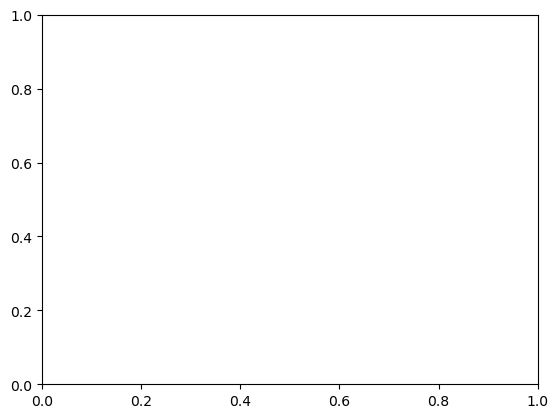

In [117]:
#Obtain the movie attributes
movies1_df = moviesData[moviesData['MovieID'].isin(movies1)]
print(movies1_df)
#movies1_df["Year"] = movies1_df['Title'].str.extract('\((\d{4})\)',expand=False)
years = movies1_df['Title'].str.extract('\((\d{4})\)',expand=False)

#Define the years the movies were released and corresponding labels
labels_year = np.unique(years)
#print(labels_age)

#Apply the PCA on the U-matrix, reducing the number of user-features and thus the amount of columns to 2
pca = PCA(n_components=2)
pca_data = pca.fit_transform(V1)

print(pca_data)

#Visualise the clustering based on gender
fig, ax = plt.subplots()
label_index = 0
for g in np.unique(years):
    indices = np.where(years == g)
    ax.scatter(pca_data[:,0][indices], pca_data[:,1][indices], s=7,alpha=0.5,label=labels_year[label_index])
    label_index += 1
ax.legend()
ax.set_title('U matrix using PCA based on user gender')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
plt.show()

In [ ]:
M1_tsne = TSNE(n_components=2)
M1_tsne_30 = M1_tsne.fit_transform(U1)

plt.scatter(M1_tsne_30[:,0],M1_tsne_30[:,1],s=3,alpha=0.7,c=user_gender)
plt.title('U matrix using t-SNE based on gender')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

fig, ax = plt.subplots()
for g in np.unique(user_age):
    i = np.where(U1_age == g)
    ax.scatter(M1_tsne_30[:, 0][i], M1_tsne_30[:, 1][i], s=7,alpha=0.7,label=g)
ax.legend()
ax.set_title('U matrix using t-SNE based on gender')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
plt.show()

MovieID  1     2     3     4     5     6     7     8     9     10    ...  \
UserID                                                               ...   
1         5.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
2         0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
3         0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
4         0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
5         0.0   0.0   0.0   0.0   0.0   2.0   0.0   0.0   0.0   0.0  ...   
...       ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   
6036      0.0   0.0   0.0   2.0   0.0   3.0   0.0   0.0   0.0   0.0  ...   
6037      0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
6038      0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
6039      0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
6040      3.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   

MovieID  39

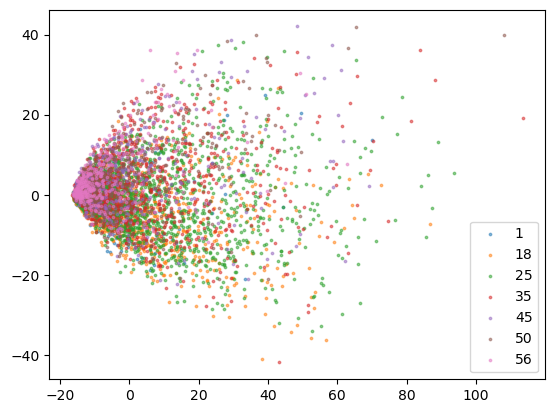

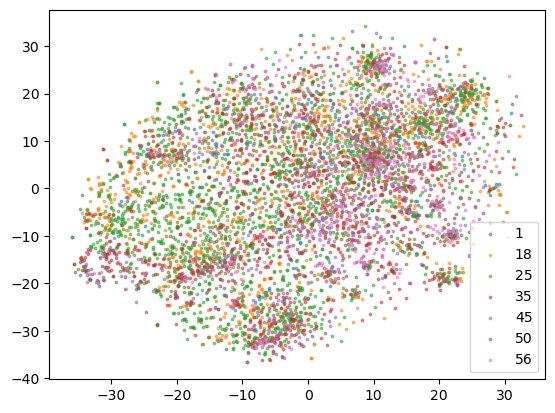

In [21]:
user_movies = ratingsData.pivot(index = "UserID", columns ="MovieID", values = "Rating")
user_movies = user_movies.fillna(0)
print(user_movies)

user_gender = usersData['Gender']
user_age = usersData['Age']

#label male user with 0, female with 1 
user_gender = [0 if x == 'M' else 1 for x in user_gender]

#########################################
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Apply PCA for dimensionality reduction
#scaler = StandardScaler()
#scaled_matrix = scaler.fit_transform(user_movies)
pca = PCA(n_components=2)
pca_result = pca.fit_transform(user_movies)

fig, ax = plt.subplots()
for g in np.unique(user_age):
    i = np.where(user_age == g)
    ax.scatter(pca_result[:, 0][i], pca_result[:, 1][i], s=3,alpha=0.5,label=g)
ax.legend()
plt.show()

    
# Visualize the 2D representation using a scatter plot
#plt.figure(figsize=(8, 6))
#plt.scatter(pca_result[:, 0], pca_result[:, 1], alpha=0.5,c=user_age)
#plt.title('2D Visualization of the User-Movie Matrix using PCA')
#plt.xlabel('Principal Component 1')
#plt.ylabel('Principal Component 2')
#plt.show()
#########################################

M1_tsne = TSNE(n_components=2)
M1_tsne_30 = M1_tsne.fit_transform(user_movies)

fig, ax = plt.subplots()
for g in np.unique(user_age):
    i = np.where(user_age == g)
    ax.scatter(M1_tsne_30[:, 0][i], M1_tsne_30[:, 1][i], s=3,alpha=0.5,label=g)
ax.legend()
plt.show()

#plt.scatter(M1_tsne_30[:,0],M1_tsne_30[:,1],s=1,c=user_age)
#plt.title('2D Visualization of the User-Movie Matrix using t-SNE')
#plt.xlabel('Principal Component 1')
#plt.ylabel('Principal Component 2')
#plt.show()

[[ 5. nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [ 3. nan nan ... nan nan nan]]
(6040, 3675)
      MovieID                               Title  \
0           1                    Toy Story (1995)   
1           2                      Jumanji (1995)   
2           3             Grumpier Old Men (1995)   
3           4            Waiting to Exhale (1995)   
4           5  Father of the Bride Part II (1995)   
...       ...                                 ...   
3878     3948             Meet the Parents (2000)   
3879     3949          Requiem for a Dream (2000)   
3880     3950                    Tigerland (2000)   
3881     3951             Two Family House (2000)   
3882     3952               Contender, The (2000)   

                            Genres  
0      Animation|Children's|Comedy  
1     Adventure|Children's|Fantasy  
2                   Comedy|Romance  
3         

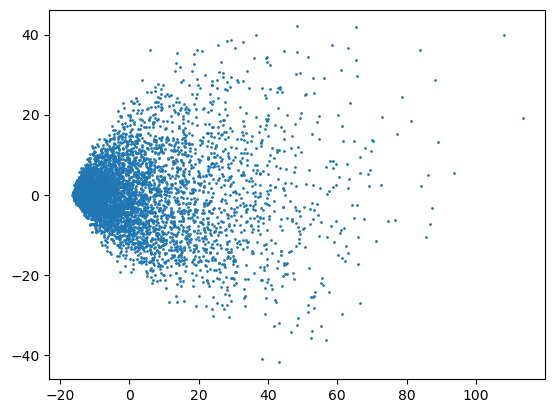

In [265]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

train_indices = []
test_indices = []

for train_index, test_index in kf.split(ratingsData):
    #print("train_index:", train_index)
    #print("test_index:", test_index)
    train_indices.append(train_index)
    test_indices.append(test_index)
    
    train_set = ratingsData.iloc[train_index]
    df_train = train_set.pivot(index = "UserID", columns ="MovieID", values = "Rating")
    X_train = np.array(df_train.to_numpy())
    
print(X_train)
print(X_train.shape)
#print(train_indices[0].shape)

ratingsData_1 = ratingsData.loc[train_indices[0]]
#print(ratingsData_1)

UM_test = ratingsData.pivot(index = "UserID", columns ="MovieID", values = "Rating")
#print(UM_test)

UM_matrix = ratingsData.pivot(index = "UserID", columns ="MovieID", values = "Rating")
UM_matrix = UM_matrix.fillna(0)
print(moviesData)
print(UM_matrix.shape)

pca = PCA(n_components=2)
pca.fit(UM_matrix)
pca_data = pca.transform(UM_matrix)
#print(pca_data.shape)

plt.scatter(pca_data[:,0],pca_data[:,1],s=1)
plt.show()

test = ratingsData_1['UserID']
#print(test.loc[:])

userData is 
       UserID Gender  Age  Occupation Zip-code
0          1      F    1          10    48067
1          2      M   56          16    70072
2          3      M   25          15    55117
3          4      M   45           7    02460
4          5      M   25          20    55455
...      ...    ...  ...         ...      ...
6035    6036      F   25          15    32603
6036    6037      F   45           1    76006
6037    6038      F   56           1    14706
6038    6039      F   45           0    01060
6039    6040      M   25           6    11106

[6040 rows x 5 columns]
(6040, 2)
0
1


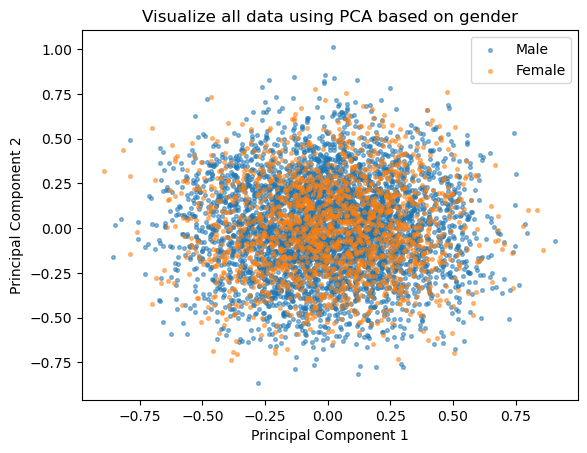

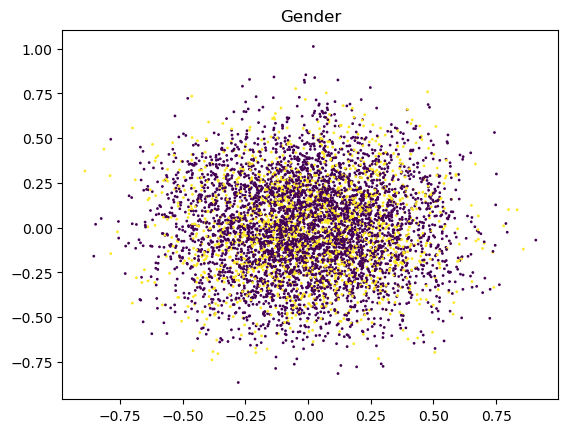

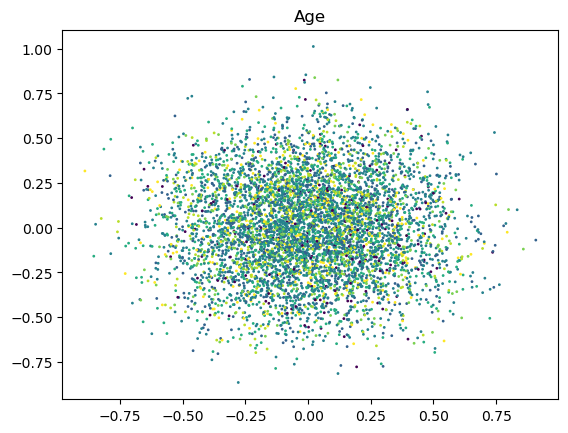

In [56]:
print('userData is \n',usersData)
movie_IDs = ratingsData['MovieID']
user_IDs = ratingsData['UserID']

user_gender = usersData['Gender']
user_age = usersData['Age']

#label male user with 0, female with 1 
user_gender = [0 if x == 'M' else 1 for x in user_gender]

pca = PCA(n_components=2)
pca.fit(U_1)
pca_data = pca.transform(U_1)
print(pca_data.shape)

fig, ax = plt.subplots()
for g in np.unique(user_gender):
    print(g)
    i = np.where(user_gender == g)
    labels = ['Male','Female']
    ax.scatter(pca_data[:,0][i], pca_data[:,1][i], s=7,alpha=0.5,label=labels[g])
ax.legend()
ax.set_title('Visualize all data using PCA based on gender')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
plt.show()

plt.scatter(pca_data[:,0],pca_data[:,1],s=1,c=user_gender)
plt.title('Gender')
plt.show()

plt.scatter(pca_data[:,0],pca_data[:,1],s=1,c=user_age)
plt.title('Age') 
plt.show()

(3676, 10)
(3683, 10)
(6040, 10)
(6040, 10)
(3683, 2)


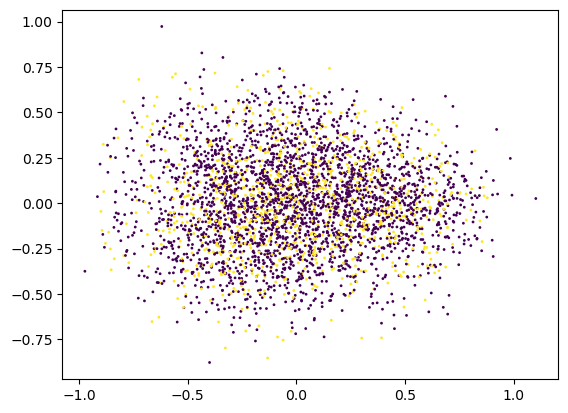

In [177]:
#First, we try reducing the dimensionality with PCA

import random
my_list = [0]*1800 + [1]*1883

random.shuffle(my_list)

print(M_2.shape)
print(M_1.shape)
print(U_1.shape)
print(U_6.shape)

pca = PCA(n_components=2)
pca.fit(M_1)
pca_data = pca.transform(M_1)
print(pca_data.shape)

plt.scatter(pca_data[:,0],pca_data[:,1],s=1,c=user_gender[0:3683])
plt.show()

TSNE(learning_rate=0.005, perplexity=30, random_state=42)


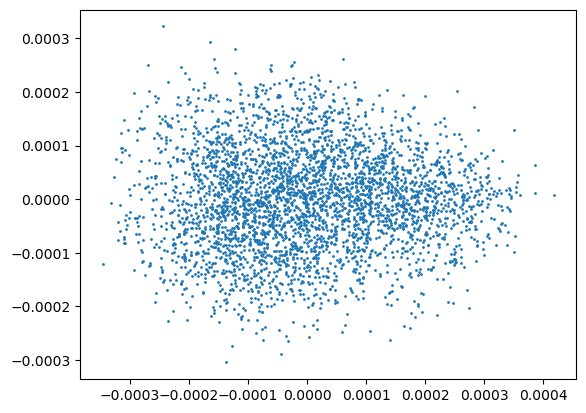

In [203]:
#T-SNE

M1_tsne = TSNE(n_components=2,learning_rate=0.005,perplexity=30,random_state=42)
print(M1_tsne)
M1_tsne_30 = M1_tsne.fit_transform(M_1)

plt.scatter(M1_tsne_30[:,0],M1_tsne_30[:,1],s=1)
plt.show()

C:\Users\jimje\anaconda3\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


[[12.465181    0.65691394]
 [10.7439785   4.074591  ]
 [ 8.374511    1.4283706 ]
 ...
 [ 6.5196548   1.2718139 ]
 [10.725165    3.0773904 ]
 [10.678437    1.1509147 ]]


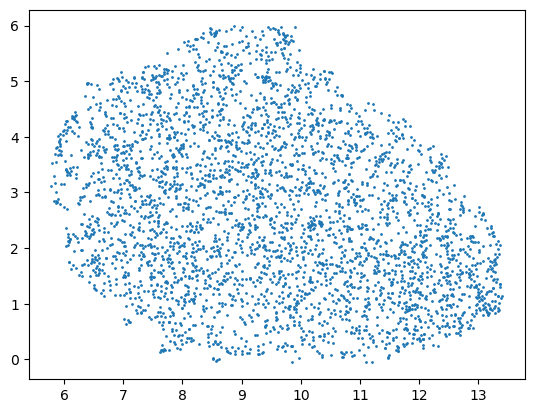

In [60]:
#UMAP

umap_M1 = umap.UMAP(n_components=2,init='random',random_state=42)
umap_fit_M1 = umap_M1.fit_transform(M_1)

print(umap_fit_M1)

plt.scatter(umap_fit_M1[:,0],umap_fit_M1[:,1],s=1)
plt.show()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
<bound method NDFrame.head of      sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149 

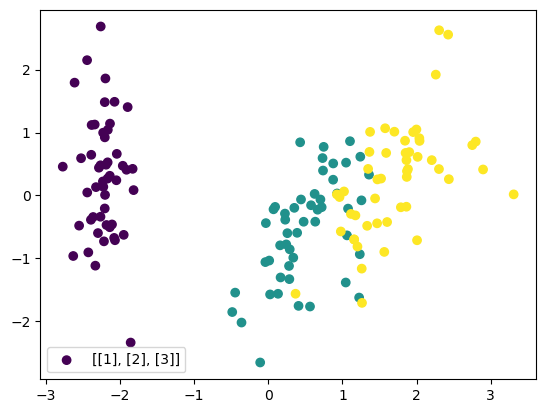

In [269]:
#testing: 
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
iris = load_iris()
print(iris.keys())
iris['target']

df = pd.DataFrame(iris['data'],columns=iris['feature_names'])
print(df.head)

#scale data
scalar = StandardScaler()
scalar.fit(df)
scaled_data = scalar.transform(df)

#now do PCA
pca = PCA(n_components=2)
pca.fit(scaled_data)
pca_data = pca.transform(scaled_data)
print(pca_data.shape)

print(iris['target'])
plt.scatter(pca_data[:,0],pca_data[:,1],c=iris['target'],label=[[1],[2],[3]])
plt.legend()
plt.show()